<div>
    <h2>Dataset Info:</h2>
    <p><strong>Context</strong></p>
    <p>Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.</p>
    <p><strong>Content</strong></p>
    <p><strong>Columns</strong></p>
    <ul>
        <li><strong>age:</strong> age of primary beneficiary</li>
        <li><strong>sex:</strong> insurance contractor gender, female, male</li>
        <li><strong>bmi:</strong> Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9</li>
        <li><strong>children:</strong> Number of children covered by health insurance / Number of dependents</li>
        <li><strong>smoker:</strong> Smoking</li>
        <li><strong>region:</strong> the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.</li>
        <li><strong>charges:</strong> Individual medical costs billed by health insurance</li>
    </ul>
</div>


# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Constant

In [2]:
DATASET_PATH = '/kaggle/input/insurance/insurance.csv'

# Code

### 1. Data Exploration

In [3]:
df = pd.read_csv(DATASET_PATH)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
print("Unique values in categorical columns:")
print("Sex:", df['sex'].unique())
print("Smoker:", df['smoker'].unique())
print("Region:", df['region'].unique())

Unique values in categorical columns:
Sex: ['female' 'male']
Smoker: ['yes' 'no']
Region: ['southwest' 'southeast' 'northwest' 'northeast']


In [7]:
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### 2. Exploratory Data Analysis

<Figure size 1000x600 with 0 Axes>

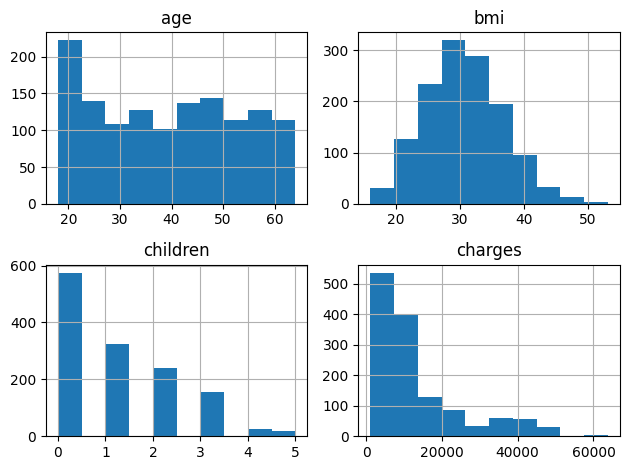

In [8]:

plt.figure(figsize=(10, 6))
df.hist()
plt.tight_layout()
plt.show()

### 3. Checking For Outliers in the data

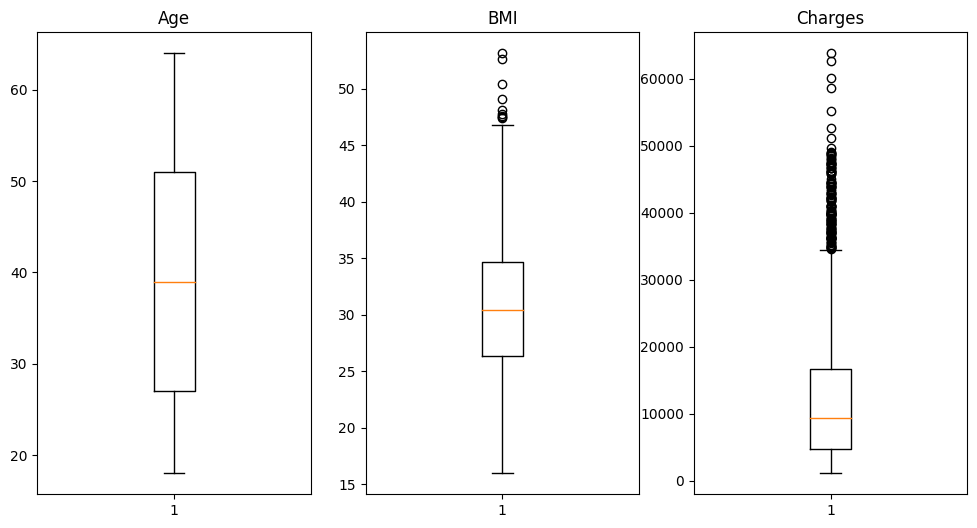

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.boxplot(df['age'])
plt.title('Age')

plt.subplot(1, 3, 2)
plt.boxplot(df['bmi'])
plt.title('BMI')

plt.subplot(1, 3, 3)
plt.boxplot(df['charges'])
plt.title('Charges')

plt.show()

### 4. Dropping outliers from the dataset

In [10]:
# Remove rows where BMI is greater than 45 and charges are greater than 15000
df_filtered = df[(df['bmi'] <= 45)]
df_filtered = df_filtered[(df['charges'] <= 15000)]

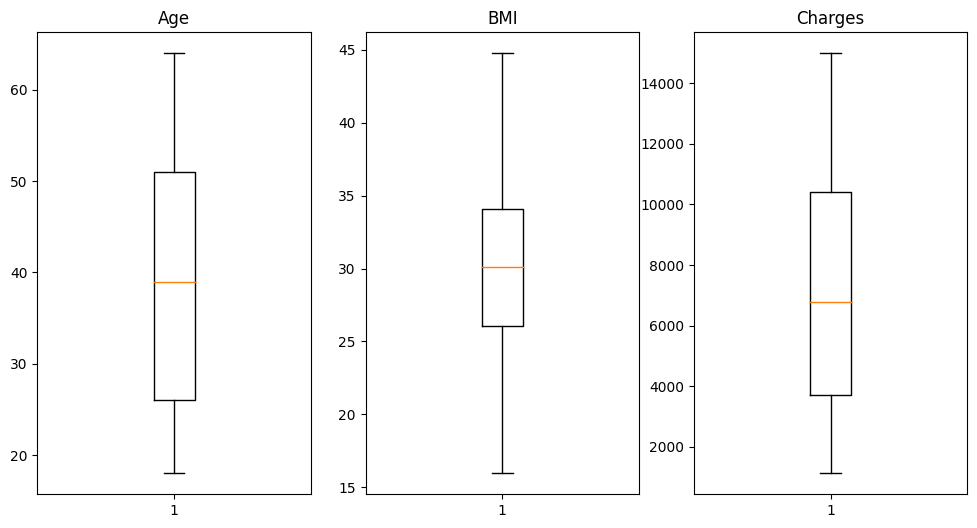

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.boxplot(df_filtered['age'])
plt.title('Age')

plt.subplot(1, 3, 2)
plt.boxplot(df_filtered['bmi'])
plt.title('BMI')

plt.subplot(1, 3, 3)
plt.boxplot(df_filtered['charges'])
plt.title('Charges')

plt.show()

In [12]:
# Percentage of removed rows (outliers)
((len(df) - len(df_filtered)) / len(df)) * 100

27.877428998505234

### 5. Train and Evaluate the Model


Model Evaluation:
Mean Squared Error (MSE): 3016640.5798178287
R-squared (R2): 0.8026063350400215


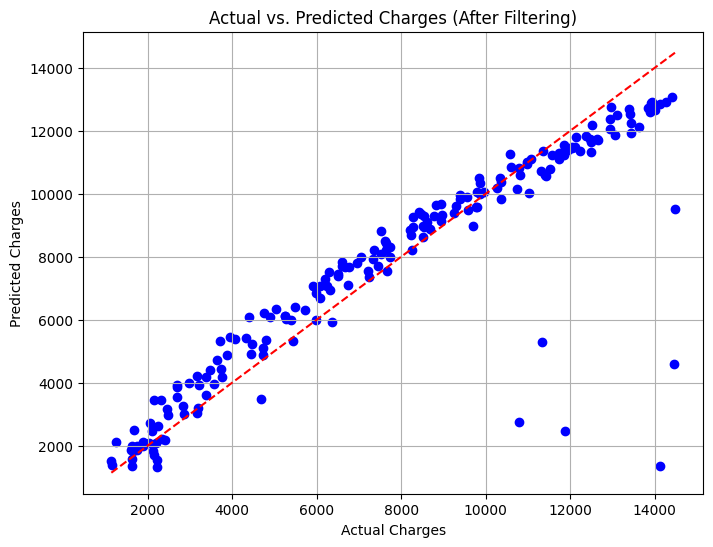

In [13]:
# Train the model with filtered data
X = df_filtered[['age', 'bmi', 'children']]  # Features
y = df_filtered['charges']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model after filtering
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Optionally, visualize the actual vs. predicted values after filtering
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges (After Filtering)')
plt.grid(True)
plt.show()


### 6. Making Predictions (Test Data)

In [14]:
# Create dummy data
dummy_data = {
    'age': [35, 40, 45],
    'bmi': [25, 30, 35],
    'children': [0, 2, 1]
}

# Convert dummy data to DataFrame
dummy_df = pd.DataFrame(dummy_data)

# Predict charges using the trained model
dummy_predictions = model.predict(dummy_df)

# Display the dummy predictions
print("Dummy Predictions:")
for i, pred in enumerate(dummy_predictions):
    print("Prediction for sample {}: ${:.2f}".format(i+1, pred))


Dummy Predictions:
Prediction for sample 1: $5955.84
Prediction for sample 2: $7695.50
Prediction for sample 3: $8479.89


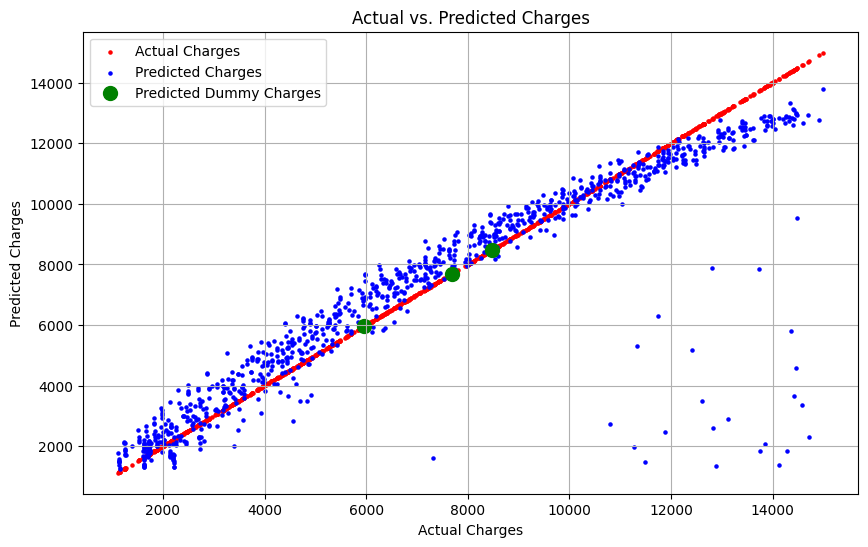

In [15]:
# Combine dummy data predictions with actual charges from the dataset
dummy_df['predicted_charges'] = dummy_predictions

# Visualize actual charges vs. predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['charges'], df_filtered['charges'], color='red', label='Actual Charges',s=5)  # Plotting actual charges vs. actual charges
plt.scatter(df_filtered['charges'], model.predict(X), color='blue', label='Predicted Charges',s=5)  # Plotting actual charges vs. predicted charges
plt.scatter(dummy_df['predicted_charges'], dummy_df['predicted_charges'], color='green', marker='o', label='Predicted Dummy Charges',s=100)  # Plotting dummy predictions
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()

<div>
    <h2>Conclusion:</h2>
    <p>In this notebook, we performed multi-linear regression analysis on a medical insurance dataset. We explored the dataset, trained a model to predict medical charges based on age, BMI, and number of children, and evaluated its performance. Additionally, we treated outliers, visualized actual vs. predicted charges, and tested the model with dummy data, providing insights into predicting medical charges.</p>
</div>
